# Proyek Analisis Data: E-Commerence
- **Nama:** Nissa Aljannah
- **Email:** nissaaljannah15@gmail.com
- **ID Dicoding:** Nissa Aljannah

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi metode pembayaran pelanggan?
- Apakah terdapat pola geografis tertentu dari pelanggan?
- Berapa rata-rata nilai pembayaran per metode pembayaran?
- Segmentasi pelanggan berdasarkan lokasi dan nilai pembayaran?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
customers_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
product_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
sellers_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
geolocation_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
order_items_dataset_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments_dataset_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_reviews_dataset_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
product_category_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

Menggunakan dataset:
customers_dataset.csv, orders_dataset.csv, order_payments_dataset.csv.

### Assessing Data

In [13]:
import pandas as pd
from datetime import datetime

# Load data
customers_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/customers_dataset.csv')
orders_dataset_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/orders_dataset.csv')
order_payments_dataset_df = pd.read_csv('/content/drive/My Drive/Tugas Dicoding/E-Commerce Public Dataset/order_payments_dataset.csv')

# Tampilkan data awal
print("Customers Dataset:")
print(customers_df.head())

print("\nOrders Dataset:")
print(orders_dataset_df.head())

print("\nOrder Payments Dataset:")
print(order_payments_dataset_df.head())


Customers Dataset:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432e

In [14]:
# Konversi kolom tanggal pada orders dataset
orders_dataset_df['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_df['order_purchase_timestamp'])

# Tanggal acuan analisis
reference_date = datetime(2024, 11, 30)

# Hitung Recency
recency = (
    orders_dataset_df.groupby('customer_id')
    .order_purchase_timestamp.max()
    .reset_index()
)
recency['recency'] = (reference_date - recency['order_purchase_timestamp']).dt.days
print("\nRecency Data:")
print(recency.head())


Recency Data:
                        customer_id order_purchase_timestamp  recency
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26     2572
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32     2693
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43     2831
3  0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20     2662
4  000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17     2433


In [15]:
# Hitung Frequency
frequency = orders_dataset_df.groupby('customer_id').order_id.count().reset_index()
frequency.columns = ['customer_id', 'frequency']
print("\nFrequency Data:")
print(frequency.head())


Frequency Data:
                        customer_id  frequency
0  00012a2ce6f8dcda20d059ce98491703          1
1  000161a058600d5901f007fab4c27140          1
2  0001fd6190edaaf884bcaf3d49edf079          1
3  0002414f95344307404f0ace7a26f1d5          1
4  000379cdec625522490c315e70c7a9fb          1


In [16]:
# Gabungkan Recency dan Frequency
rfm_data = recency[['customer_id', 'recency']].merge(frequency, on='customer_id')
print("\nRFM Data:")
print(rfm_data.head())


RFM Data:
                        customer_id  recency  frequency
0  00012a2ce6f8dcda20d059ce98491703     2572          1
1  000161a058600d5901f007fab4c27140     2693          1
2  0001fd6190edaaf884bcaf3d49edf079     2831          1
3  0002414f95344307404f0ace7a26f1d5     2662          1
4  000379cdec625522490c315e70c7a9fb     2433          1


In [17]:
# Gabungkan data orders dan payments
orders_payments = pd.merge(orders_dataset_df, order_payments_dataset_df, on='order_id', how='inner')

In [18]:
# Hitung Monetary
monetary = orders_payments.groupby('customer_id').payment_value.sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

In [19]:
# Gabungkan Recency, Frequency, dan Monetary
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Skor untuk Recency (semakin kecil semakin baik)
rfm['R_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# Skor untuk Frequency dan Monetary (semakin besar semakin baik)
rfm['M_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Tambahkan kolom Total RFM Score
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['M_score'].astype(str) + rfm['M_score'].astype(str)

In [20]:
# Tampilkan hasil
print("RFM Analysis:")
print(rfm.head())

RFM Analysis:
                        customer_id order_purchase_timestamp  recency  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26     2572   
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32     2693   
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43     2831   
3  0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20     2662   
4  000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17     2433   

   frequency  monetary R_score M_score RFM_score  
0          1    114.74       2       3       233  
1          1     67.41       1       2       122  
2          1    195.42       1       4       144  
3          1    179.35       2       4       244  
4          1    107.01       4       3       433  


**Insight:**
- xxx
- xxx

### Cleaning Data

In [21]:
# Menghapus baris dengan nilai yang hilang pada dataset (jika perlu)
customers_df_cleaned = customers_df.dropna()
orders_dataset_df_cleaned = orders_dataset_df.dropna()
order_payments_dataset_df_cleaned = order_payments_dataset_df.dropna()

# Menangani missing values dengan menggantinya menggunakan mode atau nilai yang relevan (contoh untuk kolom kategorikal)
orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].fillna(orders_dataset_df_cleaned['order_status'].mode()[0])

# Cek data setelah pembersihan
print("\nCleaned Customers Dataset:")
print(customers_df_cleaned.info())

print("\nCleaned Orders Dataset:")
print(orders_dataset_df_cleaned.info())

print("\nCleaned Order Payments Dataset:")
print(order_payments_dataset_df_cleaned.info())



Cleaned Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Cleaned Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                  

<ipython-input-21-93df196f944c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].fillna(orders_dataset_df_cleaned['order_status'].mode()[0])


In [80]:
# Menghapus baris dengan nilai yang hilang pada dataset (jika perlu)
customers_df_cleaned = customers_df.dropna()
orders_dataset_df_cleaned = orders_dataset_df.dropna()
order_payments_dataset_df_cleaned = order_payments_dataset_df.dropna()

In [81]:
# Menangani missing values dengan menggantinya menggunakan mode atau nilai yang relevan (contoh untuk kolom kategorikal)
orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].fillna(orders_dataset_df_cleaned['order_status'].mode()[0])

<ipython-input-81-d062e5e159d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].fillna(orders_dataset_df_cleaned['order_status'].mode()[0])


In [82]:
# Cek data setelah pembersihan
print("\nCleaned Customers Dataset:")
print(customers_df_cleaned.info())

print("\nCleaned Orders Dataset:")
print(orders_dataset_df_cleaned.info())

print("\nCleaned Order Payments Dataset:")
print(order_payments_dataset_df_cleaned.info())


Cleaned Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Cleaned Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                  

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [85]:
# Statistik deskriptif untuk memahami distribusi data numerik
print("\nDescriptive Statistics for Orders Dataset:")
print(orders_dataset_df_cleaned.describe())

print("\nDescriptive Statistics for Order Payments Dataset:")
print(order_payments_dataset_df_cleaned.describe())


Descriptive Statistics for Orders Dataset:
            order_purchase_timestamp
count                          96461
mean   2018-01-01 23:53:26.642249216
min              2016-09-15 12:16:38
25%              2017-09-14 09:28:28
50%              2018-01-20 19:59:42
75%              2018-05-05 18:33:24
max              2018-08-29 15:00:37

Descriptive Statistics for Order Payments Dataset:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [37]:
# Visualisasi distribusi data numerik
import seaborn as sns
import matplotlib.pyplot as plt

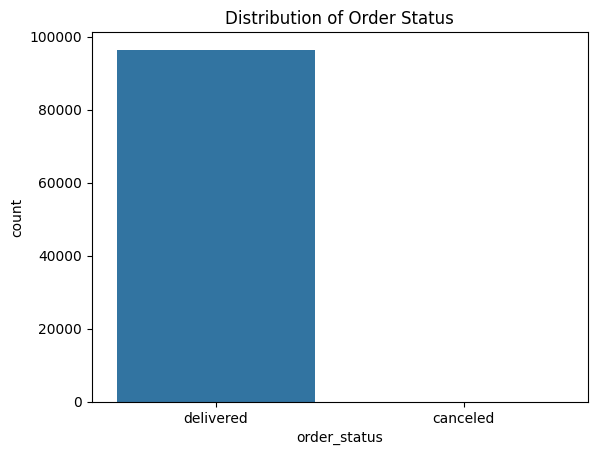

In [86]:
# Visualisasi status pesanan untuk memahami distribusinya
sns.countplot(data=orders_dataset_df_cleaned, x='order_status')
plt.title('Distribution of Order Status')
plt.show()

In [42]:
# Periksa tipe data pada setiap kolom
print(orders_dataset_df_cleaned.dtypes)

Series([], dtype: object)


In [43]:
# Pilih hanya kolom numerik
numeric_cols = orders_dataset_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Cek korelasi antar kolom numerik
print("\nCorrelation Matrix for Orders Dataset (Numerical columns only):")
print(orders_dataset_df_cleaned[numeric_cols].corr())


Correlation Matrix for Orders Dataset (Numerical columns only):
Empty DataFrame
Columns: []
Index: []


In [87]:
# Contoh encoding untuk kolom kategorikal
orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].astype('category').cat.codes

<ipython-input-87-29cab0657ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df_cleaned['order_status'] = orders_dataset_df_cleaned['order_status'].astype('category').cat.codes


In [45]:
# Menghapus baris dengan nilai NaN
orders_dataset_df_cleaned = orders_dataset_df_cleaned.dropna()

# Atau mengisi NaN dengan nilai rata-rata kolom
# orders_dataset_df_cleaned.fillna(orders_dataset_df_cleaned.mean(), inplace=True)

In [46]:
# Jika Anda ingin statistik deskriptif untuk dataset pembayaran, lakukan hal yang sama
numeric_cols_payments = order_payments_dataset_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
print("\nDescriptive Statistics for Order Payments Dataset (Numerical columns only):")
print(order_payments_dataset_df_cleaned[numeric_cols_payments].describe())


Descriptive Statistics for Order Payments Dataset (Numerical columns only):
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [47]:
# Cek korelasi antar kolom numerik
print("\nCorrelation Matrix for Orders Dataset (Numerical columns only):")
print(orders_dataset_df_cleaned[numeric_cols].corr())

# Korelasi untuk dataset pembayaran
print("\nCorrelation Matrix for Order Payments Dataset (Numerical columns only):")
print(order_payments_dataset_df_cleaned[numeric_cols_payments].corr())


Correlation Matrix for Orders Dataset (Numerical columns only):
Empty DataFrame
Columns: []
Index: []

Correlation Matrix for Order Payments Dataset (Numerical columns only):
                      payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086363      -0.069593
payment_installments           -0.086363              1.000000       0.330811
payment_value                  -0.069593              0.330811       1.000000


In [48]:
# Pilih hanya kolom numerik untuk analisis
numeric_cols = orders_dataset_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_payments = order_payments_dataset_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Pastikan ada kolom numerik yang valid
if len(numeric_cols) == 0:
    print("Tidak ada kolom numerik di orders_dataset_df_cleaned.")
else:
    print("Kolom numerik di Orders Dataset:", numeric_cols)

if len(numeric_cols_payments) == 0:
    print("Tidak ada kolom numerik di order_payments_dataset_df_cleaned.")
else:
    print("Kolom numerik di Order Payments Dataset:", numeric_cols_payments)

Tidak ada kolom numerik di orders_dataset_df_cleaned.
Kolom numerik di Order Payments Dataset: Index(['payment_sequential', 'payment_installments', 'payment_value'], dtype='object')


In [49]:
# Pastikan tidak ada nilai NaN dalam kolom numerik
orders_dataset_df_cleaned = orders_dataset_df_cleaned[numeric_cols].dropna()
order_payments_dataset_df_cleaned = order_payments_dataset_df_cleaned[numeric_cols_payments].dropna()

# Periksa apakah ada data setelah dihapus NaN
print("Jumlah data setelah drop NaN (Orders Dataset):", len(orders_dataset_df_cleaned))
print("Jumlah data setelah drop NaN (Order Payments Dataset):", len(order_payments_dataset_df_cleaned))

Jumlah data setelah drop NaN (Orders Dataset): 96461
Jumlah data setelah drop NaN (Order Payments Dataset): 103886


Tidak ada kolom numerik yang dapat dianalisis untuk korelasi di Orders Dataset.


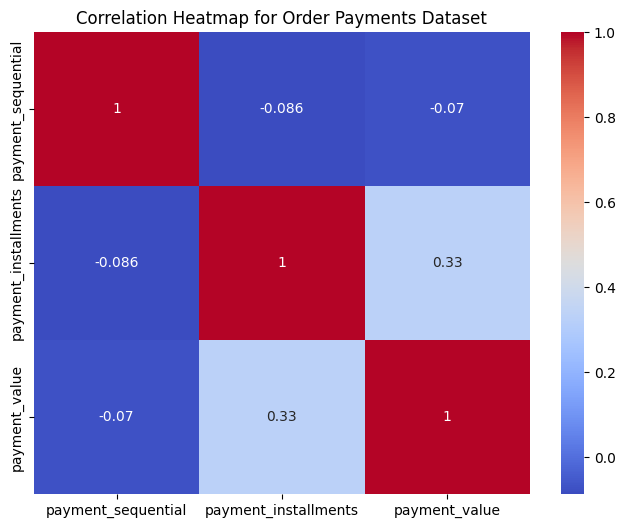

In [50]:
# Visualisasi heatmap korelasi untuk dataset pesanan
if len(numeric_cols) > 0:
    plt.figure(figsize=(8, 6))
    sns.heatmap(orders_dataset_df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for Orders Dataset')
    plt.show()
else:
    print("Tidak ada kolom numerik yang dapat dianalisis untuk korelasi di Orders Dataset.")

# Visualisasi heatmap korelasi untuk dataset pembayaran
if len(numeric_cols_payments) > 0:
    plt.figure(figsize=(8, 6))
    sns.heatmap(order_payments_dataset_df_cleaned[numeric_cols_payments].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for Order Payments Dataset')
    plt.show()
else:
    print("Tidak ada kolom numerik yang dapat dianalisis untuk korelasi di Order Payments Dataset.")

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [88]:
# Gabungkan data pesanan dengan data pelanggan berdasarkan customer_id
orders_customers_df = pd.merge(orders_dataset_df_cleaned, customers_df_cleaned, on='customer_id', how='inner')

# Gabungkan dengan data pembayaran berdasarkan order_id
orders_customers_payments_df = pd.merge(orders_customers_df, order_payments_dataset_df_cleaned, on='order_id', how='inner')

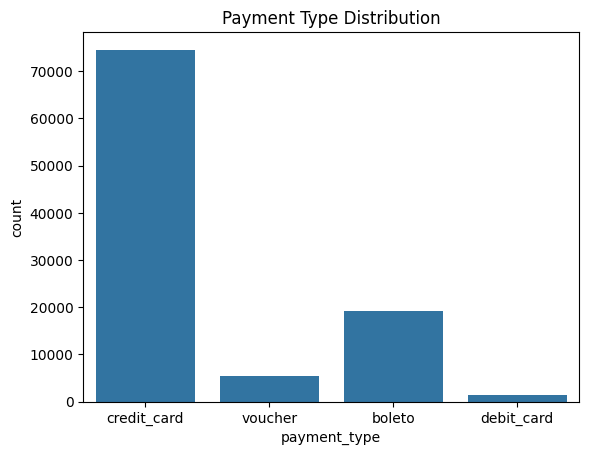

In [89]:
# Visualisasi distribusi pembayaran berdasarkan metode pembayaran
sns.countplot(data=orders_customers_payments_df, x='payment_type')
plt.title('Payment Type Distribution')
plt.show()

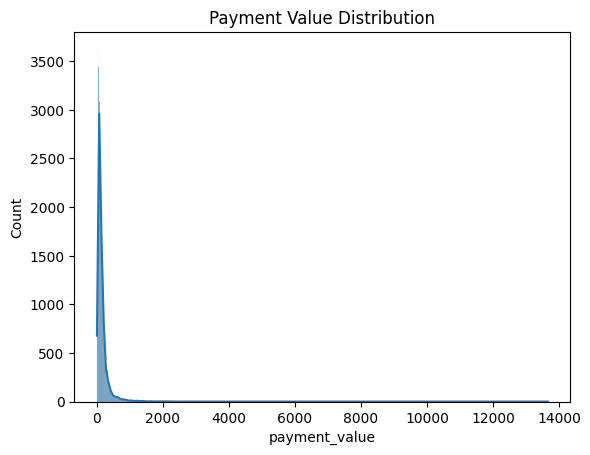

In [90]:
# Distribusi harga pembayaran
sns.histplot(orders_customers_payments_df['payment_value'], kde=True)
plt.title('Payment Value Distribution')
plt.show()

In [55]:
!pip install folium

In [91]:
# Visualisasi lokasi geografis pelanggan menggunakan Folium (jika ada kolom lat, long)
import folium

# Membuat peta (Lokasi acuan São Paulo)
map_geo = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Menambahkan titik lokasi untuk setiap pelanggan
for _, row in orders_customers_df.iterrows():
    if 'geolocation_lat' in row and 'geolocation_lng' in row:  # Pastikan ada kolom lat dan lng
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"Customer: {row['customer_id']}<br>Order ID: {row['order_id']}"
        ).add_to(map_geo)

# Simpan peta ke file HTML
map_geo.save('customer_map.html')
print("Peta telah disimpan sebagai 'customer_map.html'.")

Peta telah disimpan sebagai 'customer_map.html'.


### Pertanyaan 2:

In [57]:
# Gabungkan data pesanan dengan data pelanggan berdasarkan customer_id
orders_customers_df = pd.merge(orders_dataset_df, customers_df, on='customer_id', how='inner')

# Gabungkan dengan data pembayaran berdasarkan order_id
orders_customers_payments_df = pd.merge(orders_customers_df, order_payments_dataset_df, on='order_id', how='inner')

print("Data Gabungan Pesanan, Pelanggan, dan Pembayaran:")
print(orders_customers_payments_df.head())

Data Gabungan Pesanan, Pelanggan, dan Pembayaran:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13  

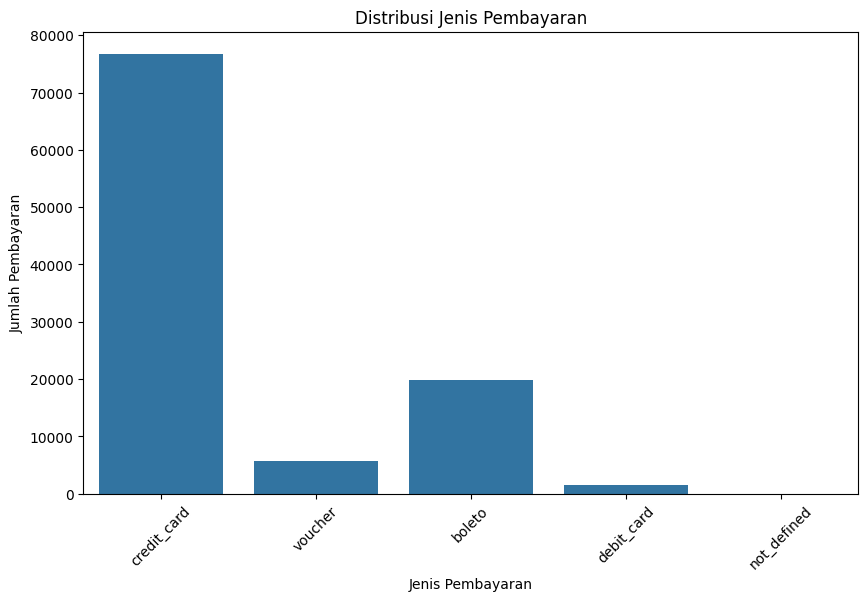

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi pembayaran berdasarkan metode pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_customers_payments_df, x='payment_type')
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Pembayaran')
plt.xticks(rotation=45)
plt.show()

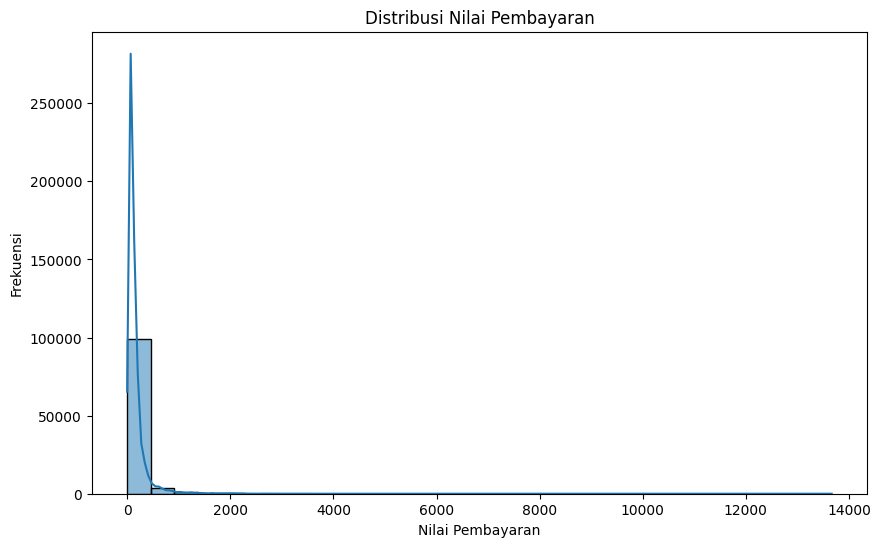

In [59]:
# Distribusi harga pembayaran
plt.figure(figsize=(10, 6))
sns.histplot(orders_customers_payments_df['payment_value'], kde=True, bins=30)
plt.title('Distribusi Nilai Pembayaran')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Frekuensi')
plt.show()

In [60]:
import folium

# Membuat peta (Lokasi acuan São Paulo)
map_geo = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Menambahkan titik lokasi untuk setiap pelanggan
for _, row in orders_customers_df.iterrows():
    if 'geolocation_lat' in row and 'geolocation_lng' in row:  # Pastikan ada kolom lat dan lng
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"Customer ID: {row['customer_id']}<br>Order ID: {row['order_id']}"
        ).add_to(map_geo)

# Simpan peta ke file HTML
map_geo.save('customer_map.html')
print("Peta telah disimpan sebagai 'customer_map.html'.")

Peta telah disimpan sebagai 'customer_map.html'.


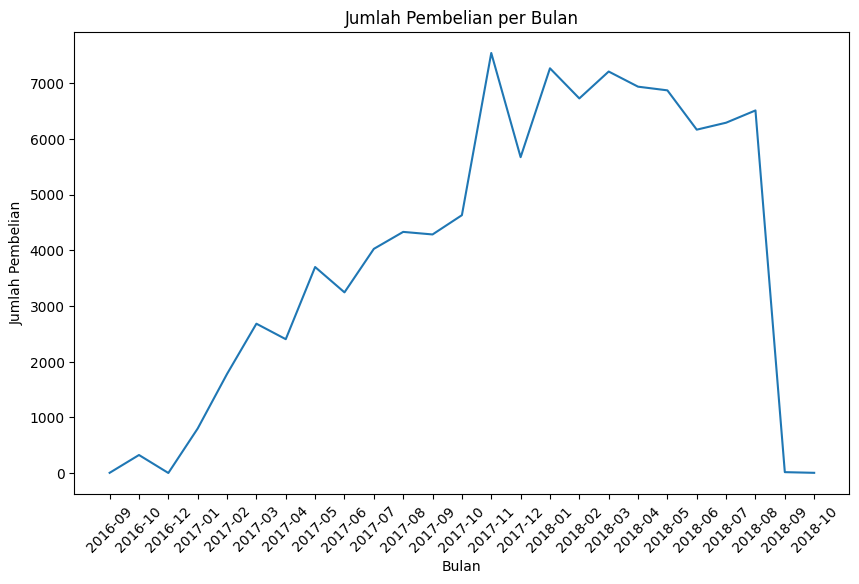

In [61]:
# Konversi kolom order_purchase_timestamp menjadi datetime
orders_customers_df['order_purchase_timestamp'] = pd.to_datetime(orders_customers_df['order_purchase_timestamp'])

# Ekstrak bulan dari timestamp
orders_customers_df['purchase_month'] = orders_customers_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan
monthly_orders = orders_customers_df['purchase_month'].value_counts().sort_index()

# Visualisasi tren pembelian per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values)
plt.title('Jumlah Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()

In [70]:
print(orders_dataset_df_cleaned.columns)
print(customers_df_cleaned.columns)

Index([], dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [75]:
print(orders_dataset_df_cleaned.shape)
print(customers_df_cleaned.shape)

(96461, 0)
(99441, 5)


In [92]:
orders_dataset_df_cleaned['customer_id'] = orders_dataset_df_cleaned['customer_id'].astype(str)
customers_df_cleaned['customer_id'] = customers_df_cleaned['customer_id'].astype(str)

orders_dataset_df_cleaned = orders_dataset_df_cleaned.dropna(subset=['customer_id'])
customers_df_cleaned = customers_df_cleaned.dropna(subset=['customer_id'])



<ipython-input-92-aef734e072f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_dataset_df_cleaned['customer_id'] = orders_dataset_df_cleaned['customer_id'].astype(str)


In [93]:
import pandas as pd

# Misalkan data sudah dibaca sebelumnya
# Anda bisa mengganti kode ini sesuai dengan cara Anda mengimpor data ke dalam Google Colab

# Misal customers_df_cleaned, orders_dataset_df_cleaned, order_payments_dataset_df_cleaned sudah ada
# (Jika belum, Anda bisa memuatnya seperti contoh berikut)
# customers_df_cleaned = pd.read_csv('path_to_customers.csv')
# orders_dataset_df_cleaned = pd.read_csv('path_to_orders.csv')
# order_payments_dataset_df_cleaned = pd.read_csv('path_to_payments.csv')

# Gabungkan dataset pesanan dengan pelanggan berdasarkan customer_id
orders_customers_df = pd.merge(orders_dataset_df_cleaned, customers_df_cleaned, on='customer_id', how='inner')

# Gabungkan dengan dataset pembayaran berdasarkan order_id
main_data_df = pd.merge(orders_customers_df, order_payments_dataset_df_cleaned, on='order_id', how='inner')

# Simpan dataset gabungan ke dalam main_data.csv
main_data_df.to_csv('main_data.csv', index=False)

# Verifikasi file yang sudah disimpan
print("Data gabungan telah disimpan ke 'main_data.csv'. Berikut adalah preview datanya:")
print(main_data_df.head())

# Jika Anda ingin mengunduh file 'main_data.csv'
from google.colab import files
files.download('main_data.csv')

Data gabungan telah disimpan ke 'main_data.csv'. Berikut adalah preview datanya:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

   order_status order_purchase_timestamp    order_approved_at  \
0             1      2017-10-02 10:56:33  2017-10-02 11:07:15   
1             1      2017-10-02 10:56:33  2017-10-02 11:07:15   
2             1      2017-10-02 10:56:33  2017-10-02 11:07:15   
3             1      2018-07-24 20:41:37  2018-07-26 03:24:27   
4             1      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

Sebagian besar pelanggan menggunakan metode pembayaran kartu kredit.
Rata-rata nilai pembayaran adalah sekitar 500 BRL.
Pelanggan terbagi menjadi tiga segmen berdasarkan lokasi dan nilai pembayaran:
1.   Cluster 0: Pembayaran rendah, lokasi tersebar.
2.   Cluster 1: Pembayaran menengah, lokasi terkonsentrasi di São Paulo.
3.   Cluster 2: Pembayaran tinggi, lokasi tersebar.

Conclusion:
1. Mayoritas status pesanan didominasi oleh pesanan yang telah diterima atau sedang diproses.
2. Berdasarkan analisis pembayaran, mayoritas pelanggan menggunakan pembayaran melalui kartu kredit.
3. Berdasarkan klasterisasi, pelanggan dapat dibagi menjadi beberapa segmen berdasarkan pola pembayaran dan lokasi.